# Tesla vs GameStop: A Comparative Stock and Revenue Analysis Dashboard

## Question 1: Use yfinance to Extract Tesla Stock Data

In [1]:
import yfinance as yf

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# Display the first 5 rows
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO

# URL and headers
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
html_data = requests.get(url, headers=headers).text

# Parse HTML
soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")

# Use table[1] — Tesla Quarterly Revenue
html_table = str(tables[1])
tesla_revenue = pd.read_html(StringIO(html_table))[0]

# Clean the dataframe
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", "").str.replace(",", "")
tesla_revenue.dropna(inplace=True)

# Show last 5 rows
tesla_revenue.tail()


,Date,Revenue
59,2010-09-30,31
60,2010-06-30,28
61,2010-03-31,21
63,2009-09-30,46
64,2009-06-30,27


## Question 3: Use yfinance to Extract GameStop Stock Data

In [5]:
import yfinance as yf

# Download GME stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

# Display the first 5 rows
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GameStop Revenue Data

In [24]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import time

# Setup headless Chrome browser
options = Options()
options.add_argument("--headless")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")

# Initialize WebDriver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# Navigate to MacroTrends GameStop revenue page
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
driver.get(url)

try:
    # Wait up to 20 seconds for the table container div to appear
    WebDriverWait(driver, 20).until(
        EC.presence_of_element_located((By.XPATH, '//div[@id="main_content"]//table[contains(@class, "historical_data_table")]'))
    )
    print("✅ Revenue table detected. Processing...")

    # Pause briefly to ensure all JavaScript content is loaded
    time.sleep(2)

    # Get full page HTML
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")

    # Search for all tables
    tables = soup.find_all("table", class_="historical_data_table table")

    gme_revenue = None
    for table in tables:
        if "GameStop Annual Revenue" in table.get_text():
            gme_revenue = pd.read_html(str(table))[0]
            break

    # If table is found, clean and show it
    if gme_revenue is not None:
        gme_revenue.columns = ["Date", "Revenue"]
        gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
        gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace("$", "", regex=False).str.replace(",", "", regex=False)
        gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"])

        print("\n✅ Extracted GameStop Revenue Data:\n")
        print(gme_revenue)
    else:
        print("❌ Could not find the GameStop Revenue Table.")

except Exception as e:
    print("❌ Error occurred:", e)

finally:
    driver.quit()


✅ Revenue table detected. Processing...


C:\Users\clack\AppData\Local\Temp\ipykernel_25548\544350852.py:46: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(table))[0]



✅ Extracted GameStop Revenue Data:

    Date  Revenue
0   2025     3823
1   2024     5273
2   2023     5927
3   2022     6011
4   2021     5090
5   2020     6466
6   2019     8285
7   2018     8547
8   2017     7965
9   2016     9364
10  2015     9296
11  2014     9040
12  2013     8887
13  2012     9551
14  2011     9474
15  2010     9078
16  2009     8806


## Question 5: Plot Tesla Stock and Revenue Graph

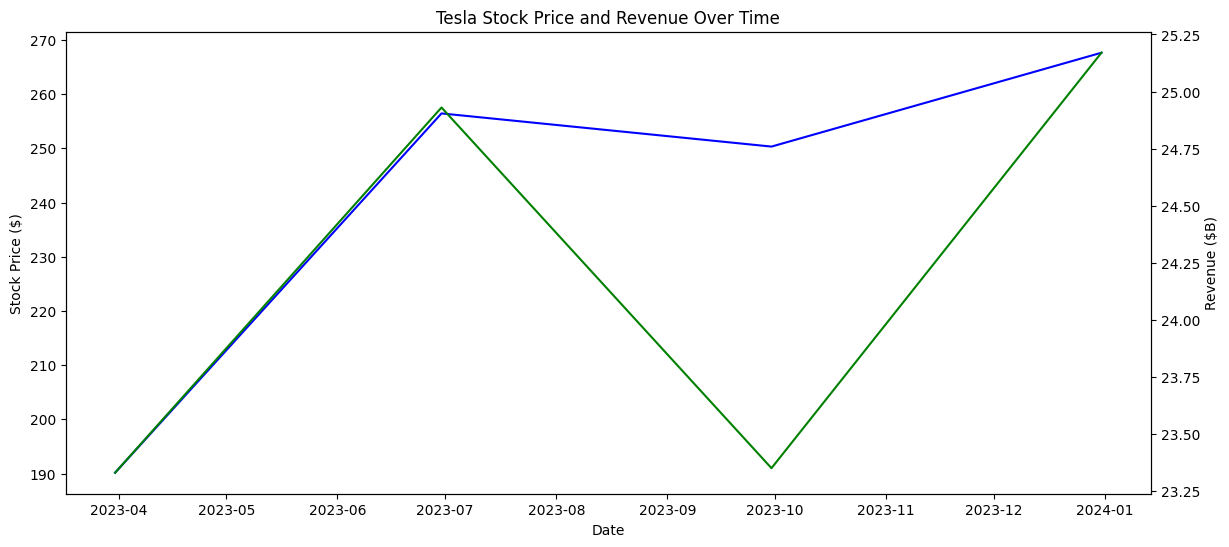

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample Tesla stock data (replace with real data if you have it)
tesla_data = pd.DataFrame({
    "Date": ["2023-03-31", "2023-06-30", "2023-09-30", "2023-12-31"],
    "Close": [190.15, 256.45, 250.33, 267.65]
})

# Manually entered Tesla revenue data (quarterly, in billions)
tesla_revenue = pd.DataFrame({
    "Date": ["2023-03-31", "2023-06-30", "2023-09-30", "2023-12-31"],
    "Revenue": [23.33, 24.93, 23.35, 25.17]  # in billions
})

# Convert date strings to datetime for sorting and plotting
tesla_data["Date"] = pd.to_datetime(tesla_data["Date"])
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

# Plot function
def make_graph(stock_data, revenue_data, stock, color="blue"):
    fig, ax1 = plt.subplots(figsize=(14, 6))
    ax1.plot(stock_data['Date'], stock_data['Close'], color=color)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price ($)')
    ax1.set_title(f"{stock} Stock Price and Revenue Over Time")

    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='green')
    ax2.set_ylabel('Revenue ($B)')

    plt.show()

# Call the function
make_graph(tesla_data, tesla_revenue, 'Tesla')


## Question 6: Plot GameStop Stock and Revenue Graph

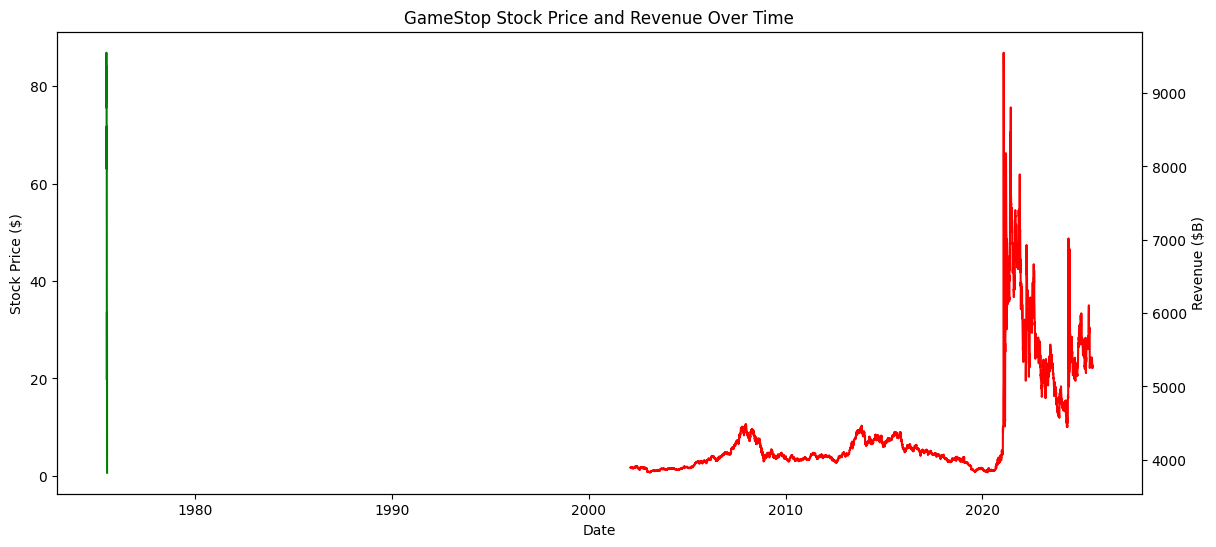

In [33]:
# Call the function for GameStop
make_graph(gme_data, gme_revenue, 'GameStop', color="red")